Power-law transform

In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
# from scipy.stats import signaltonoise
# from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit


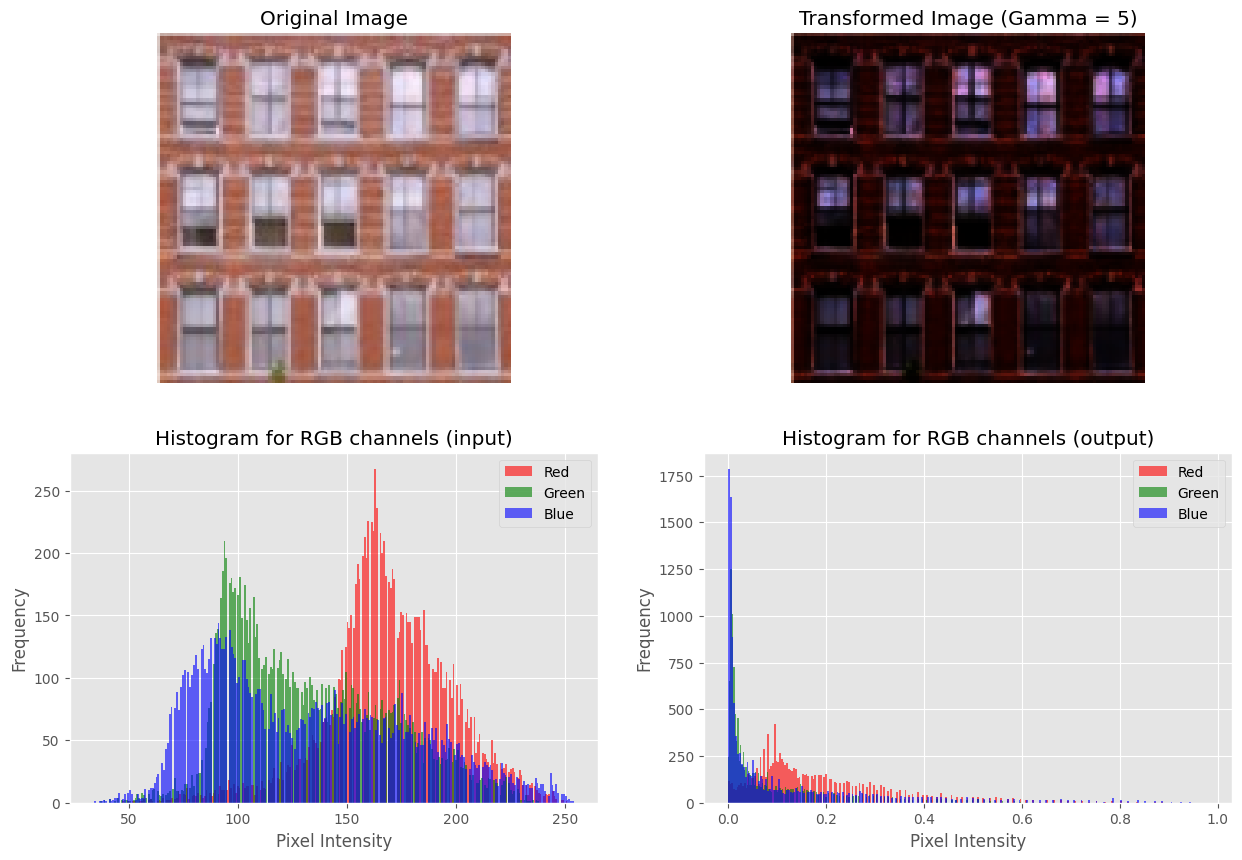

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.util import img_as_float
import pylab

def plot_hist(r_channel, g_channel, b_channel, title):
    """
    Hàm này vẽ histogram cho từng kênh màu (RGB) và hiển thị.
    
    Args:
    r_channel (numpy array): Kênh màu đỏ (Red).
    g_channel (numpy array): Kênh màu xanh lá (Green).
    b_channel (numpy array): Kênh màu xanh dương (Blue).
    title (str): Tiêu đề cho đồ thị histogram.
    """
    # Tạo một đối tượng Figure với các subplot cho 3 kênh màu
    plt.title(title)

    # Vẽ histogram cho mỗi kênh màu
    plt.hist(r_channel.ravel(), bins=256, color='red', alpha=0.6, label='Red')
    plt.hist(g_channel.ravel(), bins=256, color='green', alpha=0.6, label='Green')
    plt.hist(b_channel.ravel(), bins=256, color='blue', alpha=0.6, label='Blue')

    # Thêm nhãn và tiêu đề
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()

# Đọc ảnh gốc mà không thay đổi giá trị của nó (giữ ảnh ở định dạng integer)
im = imread('./images/building.png')  # Không sử dụng img_as_float cho ảnh gốc

# Áp dụng phép biến đổi power-law
gamma = 5
im_float = img_as_float(im)  # Chuyển ảnh sang dạng float để xử lý

# Power-law transform
im1 = im_float**gamma

# Hiển thị ảnh gốc và ảnh đã biến đổi
pylab.style.use('ggplot')
pylab.figure(figsize=(15,10))

# Hiển thị ảnh gốc (vẫn giữ nguyên giá trị ban đầu)
pylab.subplot(221)
pylab.imshow(im)  # Hiển thị ảnh gốc với giá trị integer (0-255)
pylab.title('Original Image')
pylab.axis('off')

# Hiển thị ảnh đã biến đổi (dạng float)
pylab.subplot(222)
pylab.imshow(im1)
pylab.title('Transformed Image (Gamma = 5)')
pylab.axis('off')

# Hiển thị histogram cho ảnh gốc (input)
pylab.subplot(223)
plot_hist(im[...,0], im[...,1], im[...,2], 'Histogram for RGB channels (input)')

# Hiển thị histogram cho ảnh đã biến đổi (output)
pylab.subplot(224)
plot_hist(im1[...,0], im1[...,1], im1[...,2], 'Histogram for RGB channels (output)')

# Hiển thị toàn bộ plot
pylab.show()


Contrast stretching and histogram equalization
with scikit-image


<Figure size 640x480 with 0 Axes>

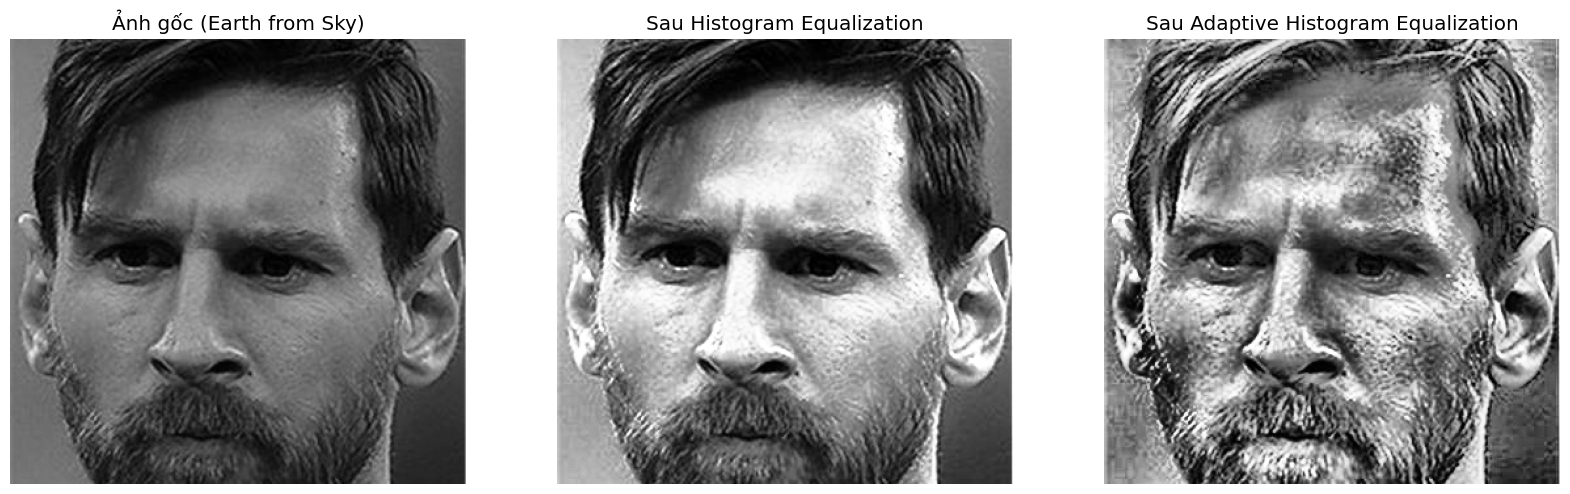

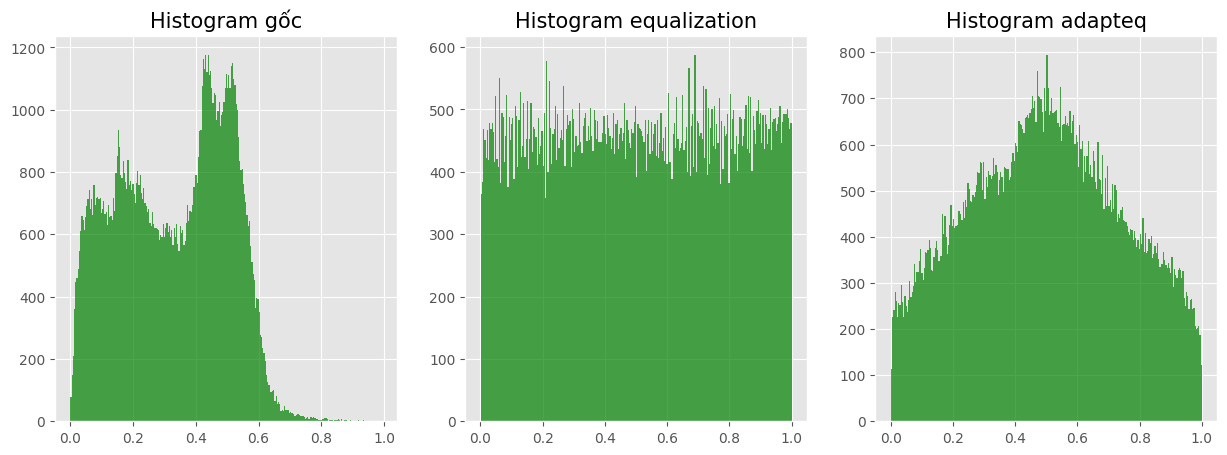

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure
from skimage.color import rgb2gray

# Đọc ảnh và chuyển sang ảnh xám (grayscale)
img = rgb2gray(io.imread('./images/messi.jpg'))

# Histogram equalization
img_eq = exposure.equalize_hist(img)

# Adaptive histogram equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Hàm vẽ ảnh
def plot_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')  # Ẩn trục

# Hiển thị ảnh và histogram
plt.gray()

# Vẽ 3 ảnh trên cùng một hàng
plt.figure(figsize=(20, 10))

# Vẽ ảnh gốc
plt.subplot(1, 3, 1)
plot_image(img, 'Ảnh gốc (Earth from Sky)')

# Vẽ ảnh sau khi histogram equalization
plt.subplot(1, 3, 2)
plot_image(img_eq, 'Sau Histogram Equalization')

# Vẽ ảnh sau khi adaptive histogram equalization
plt.subplot(1, 3, 3)
plot_image(img_adapteq, 'Sau Adaptive Histogram Equalization')

# Hiển thị các ảnh
plt.show()

# Vẽ histogram cho các ảnh
plt.figure(figsize=(15, 5))
for i, image in enumerate([img, img_eq, img_adapteq]):
    plt.subplot(1, 3, i + 1)
    plt.hist(image.ravel(), bins=256, color='g', alpha=0.7)
    plt.title(f'Histogram {["gốc", "equalization", "adapteq"][i]}', size=15)

# Hiển thị histogram
plt.show()
